In [1]:
import sys
sys.path.append('..')
print(sys.path)

['C:\\Users\\adware\\AppData\\Local\\Programs\\Python\\Python313\\python313.zip', 'C:\\Users\\adware\\AppData\\Local\\Programs\\Python\\Python313\\DLLs', 'C:\\Users\\adware\\AppData\\Local\\Programs\\Python\\Python313\\Lib', 'C:\\Users\\adware\\AppData\\Local\\Programs\\Python\\Python313', 'c:\\Users\\adware\\Documents\\KISS', '', 'c:\\Users\\adware\\Documents\\KISS\\Lib\\site-packages', 'c:\\Users\\adware\\Documents\\KISS\\Lib\\site-packages\\win32', 'c:\\Users\\adware\\Documents\\KISS\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\adware\\Documents\\KISS\\Lib\\site-packages\\Pythonwin', '..']


Updating component simulation capability

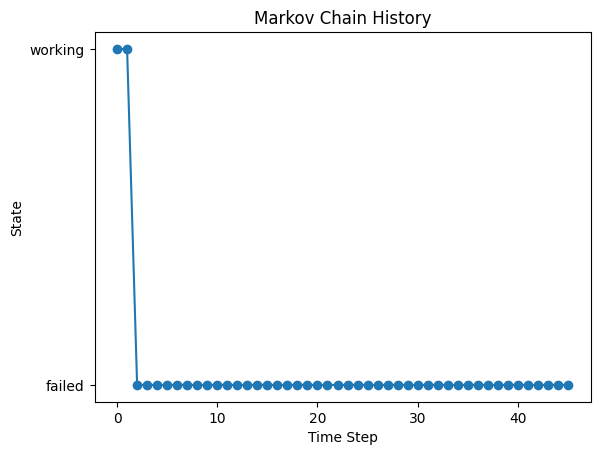

2


In [2]:
from shipClass.Component import Component

# simulation parameters
# MTTF = 5
states = {0: "failed",
          1: "working" }
sim_time = 10

# create a component with a mean time to failure (MTTF)
comp = Component("test_comp_w/_MTTF", states)

# run the simulation for a specified time
for i in range(1, sim_time):
    comp.simulate(i)

comp.plotHistory()
print(comp.determineFailureStep())

### Modeling a Component as a Markov Chain

In [3]:
import numpy as np

from shipClass.Component import Component

# setup the component as a Markov Chain
states = {0: 'Failed',
          1: 'Degraded',
          2: 'Working'}

transition_mat = np.array([[1, 0, 0],
                           [0.02, 0.98, 0],
                           [0.02, 0.20, 0.78]])

c1 = Component("comp1", states, transition_mat)
c1.simulate(25)
c1.drawChain()
c1.plotHistory()


IndexError: list index out of range

### Modeling a Sensor as a Markov Chain

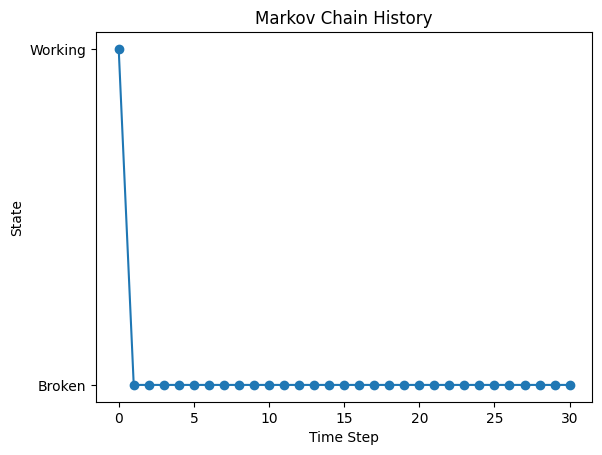

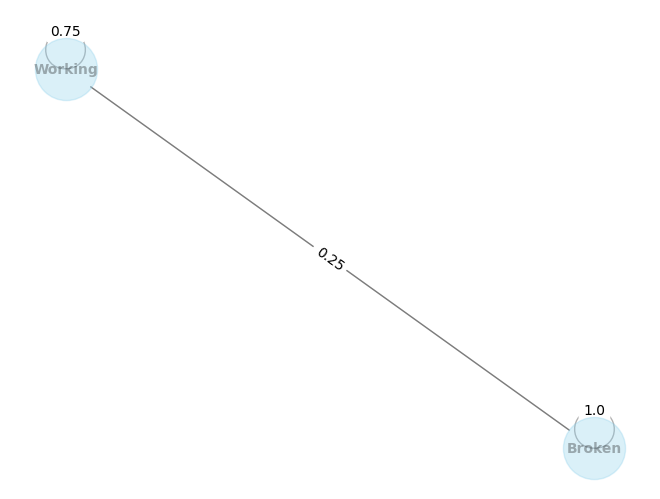

In [ ]:
import numpy as np

from shipClass.Sensor import Sensor

# setup the component as a Markov Chain
states = {0: 'Broken',
          1: 'Working'}

transition_mat = np.array([[1, 0], 
                           [0.25, 0.75]])

s1 = Sensor("comp1", states, transition_mat)
s1.simulate(30)
s1.plotHistory()
s1.drawChain()

In [ ]:
from shipClass.Sensor import Sensor
from shipClass.Component import Component
from shipClass.SensedComp import SensedComp

import numpy as np

states={0:'Broken' , 1:'Working'}
comp_transition_matrix = np.array([[1, 0],
                                    [0.25, 0.75]])
sensor_transition_matrix = np.array([[1, 0],
                                    [0.5, 0.5]])

c1 = Component("comp1", states, comp_transition_matrix)
s1 = Sensor("sensor1", states, sensor_transition_matrix)

sc1 = SensedComp(c1, s1)
sc1.simulate(10)
sc1.plotHistory()

ModuleNotFoundError: No module named 'shipClass'

# adding maintenance

In [ ]:
# testing sensedComponent with maintenance
from shipClass.Sensor import Sensor
from shipClass.Component import Component
from shipClass.SensedComp import SensedComp
from Maintainer import Maintainer

import numpy as np

# initialize a sensed component
comp_states={0: 'Working', 1: 'Broken'}
comp_transition_matrix = np.array([[0.75, 0.25], [0, 1]])
c1 = Component("comp1", comp_states, comp_transition_matrix)
sensor_states={0: 'Working', 1: 'Broken'}
sensor_transition_matrix = np.array([[0.75, 0.25], [0, 1]])
s1 = Sensor("sensor1", sensor_states, sensor_transition_matrix)
sc1 = SensedComp(c1, s1)

# initialize a maintainer
maint_man = Maintainer()

# simulate the sensed component for n steps
num_steps = 100
while len(sc1.history) < num_steps:
    sc1.simulate(1)                 # simulate the markov chain
    sc1 = maint_man.diagnose(sc1)   # check if the part needs repair

    sc1 = maint_man.preventive_maintaince(sc1) # perform preventative maintenance if its scheduled

sc1.plotHistory()


ModuleNotFoundError: No module named 'Maintainer'

### Examining reliability behavior

In [ ]:
sim_sample_time = 1 # seconds
sim_time = 90       # days

# run the simulation
c1.run_simulation(sim_time, sim_sample_time)

# plot the results
c1.history.plot(title='Component History', xlabel='Time (days)', ylabel='State', legend=True)

plotting various shapes using stats originally

In [ ]:
betas = [0.2, 1.0, 5]
for beta in betas:
    comp = Component("Engine", shape=beta, scale= 20)

    comp.plotDistros()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from shipClass.Component import Component

# simulate 1000 components and determine the MTTF of the Markov Chains
num_comps = 1000
sim_time = 300

mean_failure_times = []
for i in range(num_comps): 
    comp = Component('Test_Component', 200)
    comp.simulate(sim_time)    
    mean_failure_times.append(comp.failure_times.mean())

# plot a reliability curve for a single component
plt.plot(comp.failure_times, comp.reliability_curve)

# print the mean time to failure of all tested comps
print("Mean Time to Failure: ", np.mean(mean_failure_times))
    